In [1]:
import os
import seaborn as sns
import pandas as pd
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
import matplotlib.pyplot as plt
plt.style.use(['science'])

--

### Collect results and process 

data collection and generating one csv

In [2]:
path = "../../data/coevolution_res/finer2"
grid_res = list()
means = list()
alls = dict()
for filename in os.listdir(path):
        if filename.endswith('report.csv'):
            df = pd.read_csv(os.path.join(path,filename), index_col = 0)
            #filename = filename.replace('comm_rate','commrate').replace('shared_discount','shareddiscount')
            for h in filename[:-4].split("-")[1:]:
                field = h.split("_")[0]
                val = h.split("_")[-1]
                try: 
                    val = float(val)
                except:
                    pass
                df[field]= val  
            df['travel_decisions'] = df.travel_decisions.apply(lambda x: x.split("\n")[1:-1])
            df['travel_decisions'] = df['travel_decisions'].apply(lambda x: dict([(_.split(" ")[0],int(_.split(" ")[-1])) for _ in x]))
            df['out'] = df.travel_decisions.apply(lambda x: x.get('out',0))
            df['rh'] = df.travel_decisions.apply(lambda x: x.get('rh',0))
            df['rp'] = df.travel_decisions.apply(lambda x: x.get('rp',0))
            df['filename'] = filename.split("/")[-1]
            df.columns = [_.replace("_"," ") for _ in df.columns]
        
            means.append(df[df.day>=(df.day.max()-5)].mean())
            grid_res.append(df)
            alls[filename] = df
            
means = pd.concat(means, axis = 1).T.reset_index()
grid_res = pd.concat(grid_res)
grid_res.nV=grid_res.nV.astype(int)
grid_res.nP=grid_res.nP.astype(int)
means.nV=means.nV.astype(int)
means.nP=means.nP.astype(int)
means['share out'] = means['out']/means.nP
means['share rh'] = means['rh']/means.nP
means['share rp'] = means['rp']/means.nP
means['share drivers'] = means['n drivers']/means.nV
grid_res['$c$'] = grid_res['comm rate']
grid_res['$p$'] = grid_res['discount']
means['$c$'] = means['comm rate'].round(2)
means['$p$'] = means['discount'].round(2)
df.head()

,day,nP,nV,comm rate,discount,travel decisions,n trav,n drivers,fare,commision,...,n actually sharing,n shared rides,unserved,comm,shared,dt,out,rh,rp,filename
0,0,1100.0,60.0,1.1,0.2,"{'out': 435, 'rh': 308, 'rp': 357}",665,60,0.0000,0.0000,...,241,120,0,1.1,0.2,report,435,308,357,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...
1,1,1100.0,60.0,1.1,0.2,"{'out': 453, 'rh': 323, 'rp': 324}",647,34,0.0000,0.0000,...,204,102,0,1.1,0.2,report,453,323,324,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...
2,2,1100.0,60.0,1.1,0.2,"{'out': 513, 'rh': 282, 'rp': 305}",587,43,3333.2628,239.1816,...,192,96,0,1.1,0.2,report,513,282,305,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...
3,3,1100.0,60.0,1.1,0.2,"{'out': 527, 'rh': 286, 'rp': 287}",573,42,3232.2780,194.4810,...,163,81,0,1.1,0.2,report,527,286,287,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...
4,4,1100.0,60.0,1.1,0.2,"{'out': 539, 'rh': 274, 'rp': 287}",561,46,3187.0468,196.9380,...,188,94,0,1.1,0.2,report,539,274,287,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...


In [3]:
means.to_csv('means.csv')

---
### Best platform setting

maximize commision



100 10
100 20
100 30
100 40
100 50
100 60
300 10
300 20
300 30
300 40
300 50
300 60
500 10
500 20
500 30
500 40
500 50
500 60
700 10
700 20
700 30
700 40
700 50
700 60
900 10
900 20
900 30
900 40
900 50
900 60
1100 10
1100 20
1100 30
1100 40
1100 50
1100 60


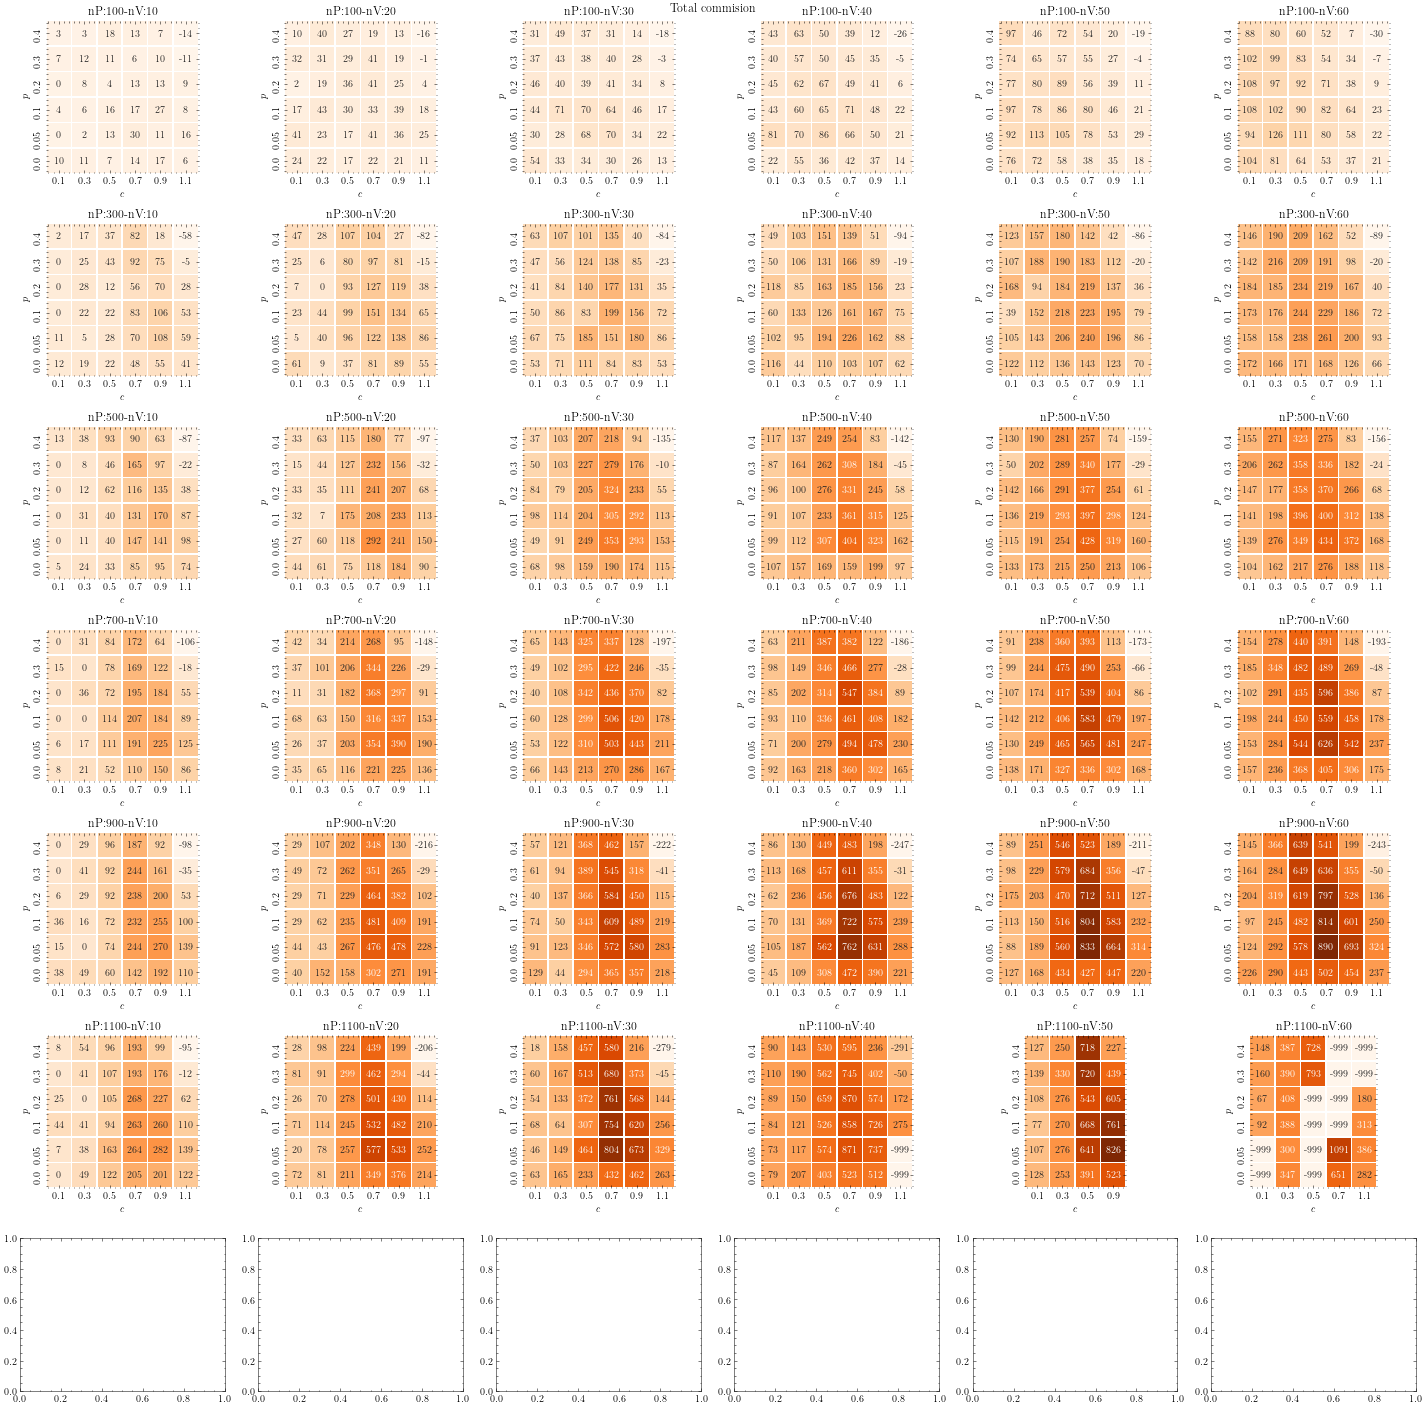

In [5]:
df = means
fig, ax = plt.subplots(means.nP.nunique(),means.nV.nunique(),figsize = (20,20))
ax = ax.flatten()
i = 0
for nP in pd.Series(means.nP.unique()).sort_values().values[:-1]:
    for nV in pd.Series(means.nV.unique()).sort_values().values:
        mtx = df[(df.nP == nP) & (df.nV ==nV)].groupby(['$p$', '$c$'])[['commision']].max().unstack().round(0).sort_index(ascending = False)
        mtx.columns = mtx.columns.get_level_values(1)
        mtx = mtx.fillna(-999).astype(int)
        sns.heatmap(mtx, annot=True, fmt = 'd', cmap='Oranges', ax = ax[i], square = True, cbar = False, center = 300, linewidths = 0.5)
        ax[i].set_title('nP:{}-nV:{}'.format(nP,nV))
        i+=1 
        print(nP,nV)
fig.suptitle('Total commision')
fig.tight_layout()

In [ ]:
best_ones = means.groupby(['nP','nV']).commision.idxmax()
means['best_one'] = means.apply(lambda x: True if x.name in best_ones.values else False, axis = 1)

In [ ]:
means[means['best_one']].groupby(['nP','nV'])[['commision','$p$','$c$']].max()

---
### Total fare

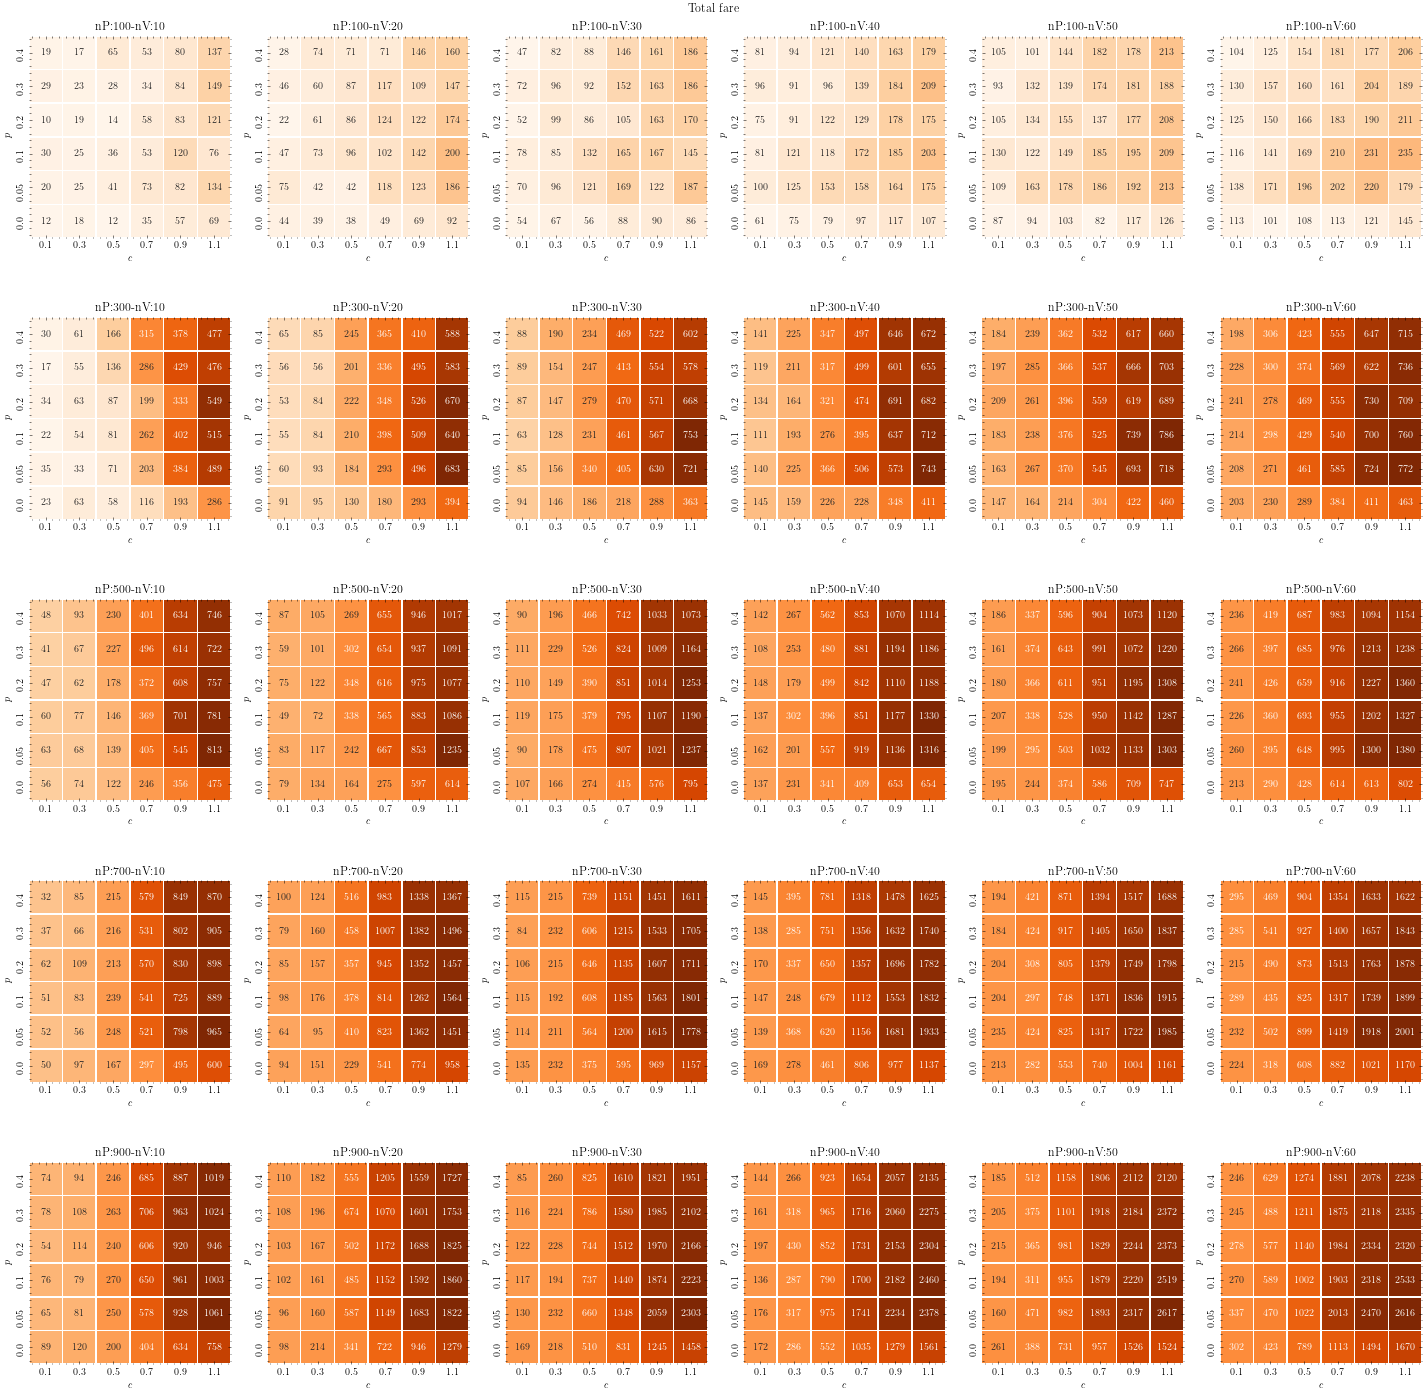

In [7]:
df = means
fig, ax = plt.subplots(means.nP.nunique(),means.nV.nunique(),figsize = (20,20))
ax = ax.flatten()
i = 0
for nP in pd.Series(means.nP.unique()).sort_values().values:
    for nV in pd.Series(means.nV.unique()).sort_values().values:
        mtx = df[(df.nP == nP) & (df.nV ==nV)].groupby(['$p$', '$c$'])[['fare']].max().unstack().round(0).sort_index(ascending = False)
        mtx.columns = mtx.columns.get_level_values(1)
        mtx = mtx.fillna(-999).astype(int)
        sns.heatmap(mtx, annot=True, fmt = 'd', cmap='Oranges', ax = ax[i], square = True, cbar = False, center = 300, linewidths = 0.5)
        ax[i].set_title('nP:{}-nV:{}'.format(nP,nV))
        i+=1 
fig.suptitle('Total fare')
fig.tight_layout()

---

### Mode choice 

(travellers split between alternative modes)

Text(0.5, 0.98, 'number of users')

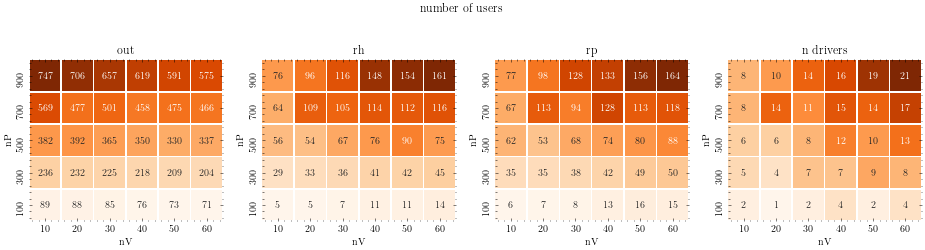

In [8]:
fig, ax = plt.subplots(1,4,figsize = (16,4))
for i, m in enumerate(['out','rh','rp','n drivers']):
    mtx = means[means.best_one].groupby(['nP','nV'])[m].max().unstack().round(0).sort_index(ascending = False).astype(int)
    sns.heatmap(mtx, annot=True, fmt = 'd', cmap='Oranges', ax = ax[i], square = True, cbar = False, linewidths = 0.5)
    ax[i].set_title(m)
fig.suptitle('number of users')

Text(0.5, 0.98, 'shares')

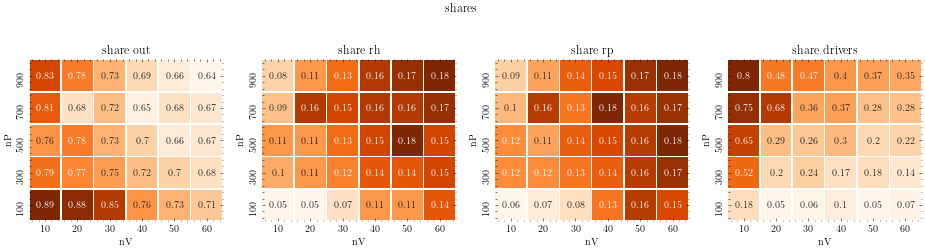

In [9]:
fig, ax = plt.subplots(1,4,figsize = (16,4))
for i, m in enumerate(['share out','share rh','share rp','share drivers']):
    mtx = means[means.best_one].groupby(['nP','nV'])[m].max().unstack().round(2).sort_index(ascending = False)
    sns.heatmap(mtx, annot=True, cmap='Oranges', ax = ax[i], square = True, cbar = False, linewidths = 0.5)
    ax[i].set_title(m)
fig.suptitle('shares')

--- 
### KPIs

other indicators

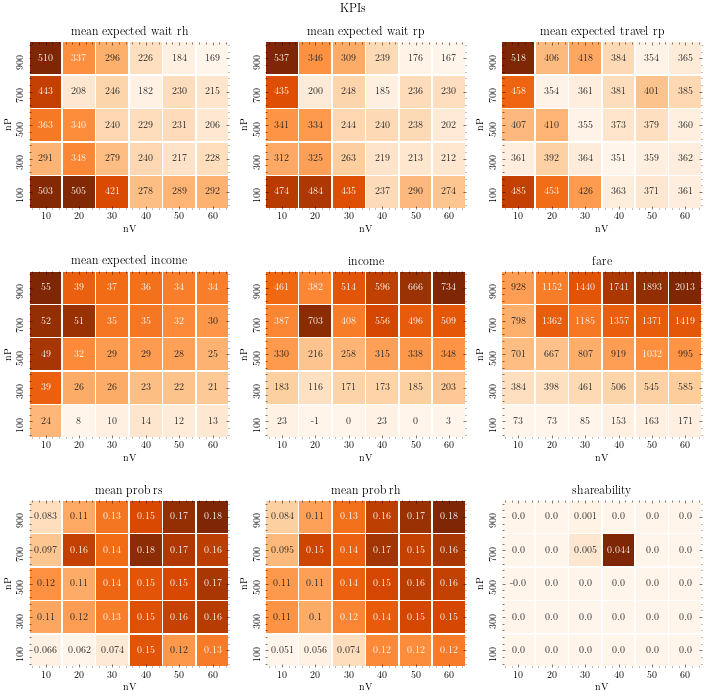

In [10]:
cols = ['mean expected wait rh','mean expected wait rp','mean expected travel rp',
        'mean expected income','income', 'fare', 
        'mean prob rs','mean prob rh', 'shareability' ]
fig, ax = plt.subplots(3,3,figsize = (10,10))
ax = ax.flatten()
for i, col in enumerate(cols):
    if i <6:
        mtx = means[means.best_one].groupby(['nP','nV'])[col].mean().unstack().round(0).sort_index(ascending = False).astype(int)
        sns.heatmap(mtx, annot=True, fmt = 'd', cmap='Oranges', ax = ax[i], square = True, cbar = False, linewidths = 0.5)
    else:
        mtx = means[means.best_one].groupby(['nP','nV'])[col].mean().unstack().round(3).sort_index(ascending = False)
        sns.heatmap(mtx, annot=True, fmt = ".2", cmap='Oranges', ax = ax[i], square = True, cbar = False, linewidths = 0.5)
        
    ax[i].set_title(col)
fig.suptitle('KPIs')
fig.tight_layout()


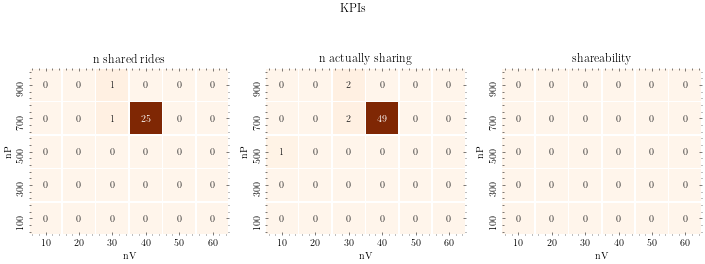

In [11]:
cols = ['n shared rides', 'n actually sharing', 'shareability' ]
fig, ax = plt.subplots(1,3,figsize = (10,4))
ax = ax.flatten()
for i, col in enumerate(cols):
    if i <6:
        mtx = means[means.best_one].groupby(['nP','nV'])[col].mean().unstack().round(0).sort_index(ascending = False).astype(int)
        sns.heatmap(mtx, annot=True, fmt = 'd', cmap='Oranges', ax = ax[i], square = True, cbar = False, linewidths = 0.5)
    else:
        mtx = means[means.best_one].groupby(['nP','nV'])[col].mean().unstack().round(3).sort_index(ascending = False)
        sns.heatmap(mtx, annot=True, fmt = ".2", cmap='Oranges', ax = ax[i], square = True, cbar = False, linewidths = 0.5)
        
    ax[i].set_title(col)
fig.suptitle('KPIs')
fig.tight_layout()


--- 
### Pooling

number of travellers actually sharing

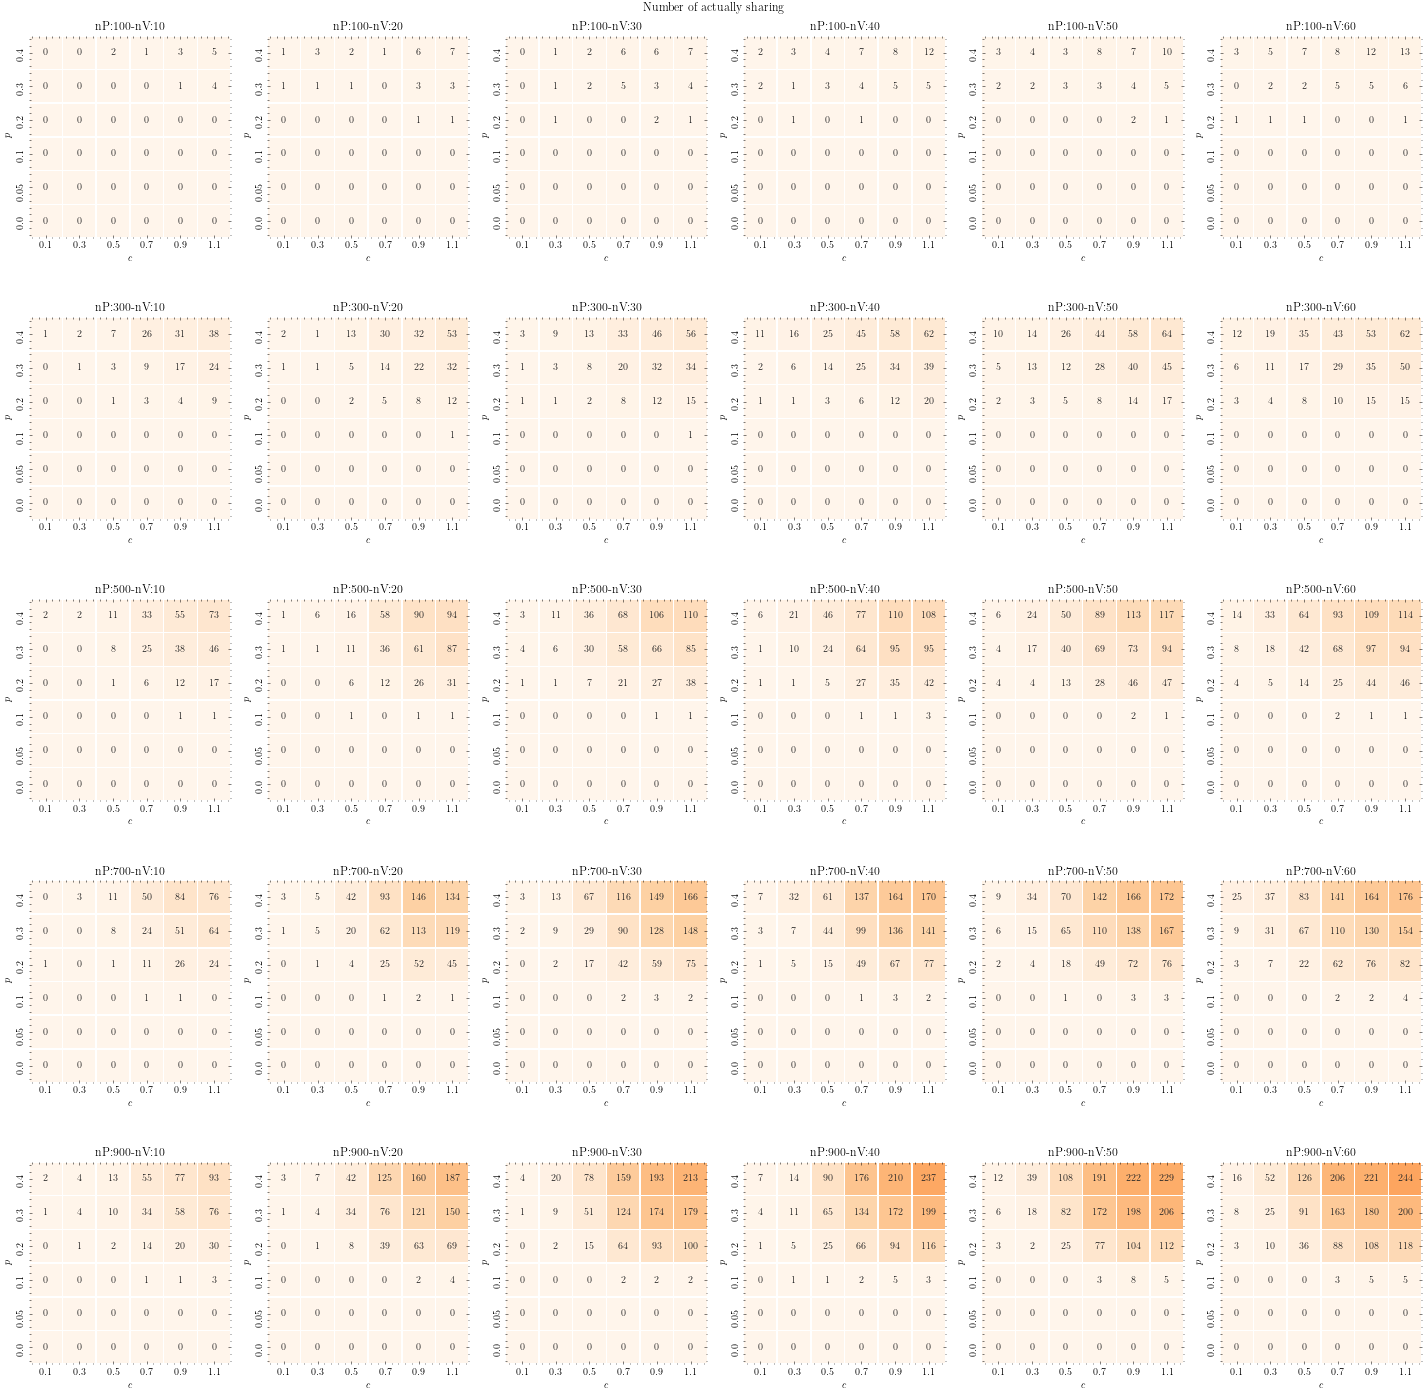

In [12]:
df = means
fig, ax = plt.subplots(means.nP.nunique(),means.nV.nunique(),figsize = (20,20))
ax = ax.flatten()
i = 0
for nP in pd.Series(means.nP.unique()).sort_values().values:
    for nV in pd.Series(means.nV.unique()).sort_values().values:
        mtx = df[(df.nP == nP) & (df.nV ==nV)].groupby(['$p$', '$c$'])[['n actually sharing']].max().unstack().round(0).sort_index(ascending = False)
        mtx.columns = mtx.columns.get_level_values(1)
        mtx = mtx.fillna(-999).astype(int)
        sns.heatmap(mtx, annot=True, fmt = 'd', cmap='Oranges', ax = ax[i], square = True, cbar = False, center = 300, linewidths = 0.5)
        ax[i].set_title('nP:{}-nV:{}'.format(nP,nV))
        i+=1 
fig.suptitle('Number of actually sharing')
fig.tight_layout()

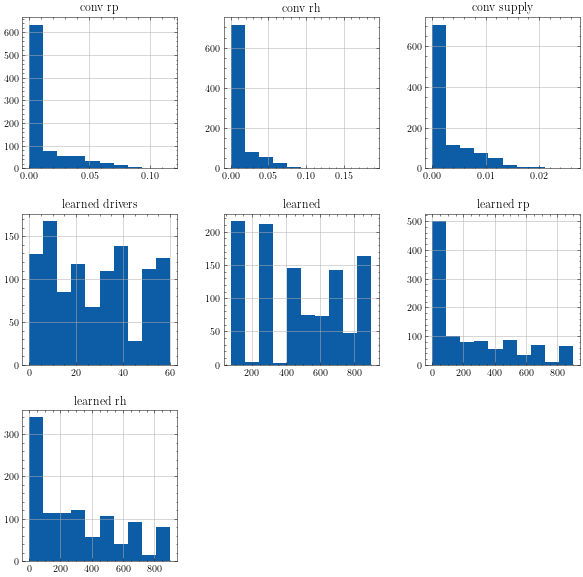

In [13]:
import numpy as np
means['conv rh'] = means['conv rh'].replace([np.inf, -np.inf], np.nan)
_ = means[['conv rp', 'conv rh', 'conv supply','learned drivers','learned','learned rp','learned rh']].hist(figsize= (10,10))

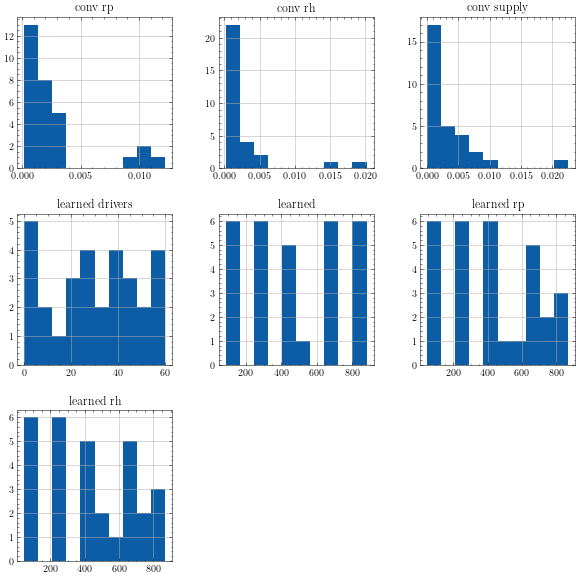

In [14]:
_ = means[means['best_one']][['conv rp', 'conv rh', 'conv supply','learned drivers','learned','learned rp','learned rh']].hist(figsize= (10,10))